<a href="https://colab.research.google.com/github/Vaibhavs1104/Bank_Loan_Credit/blob/main/Bank_Loan_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Data**

In [20]:
df=pd.read_csv('/content/financial_loan.csv')
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [21]:
df.shape

(38576, 24)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [23]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [24]:
df1=df.copy()

In [25]:
df1.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [26]:
pd.set_option('display.max_columns',None)

In [27]:
df1.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


**Preprocessing**

In [28]:
df1['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [29]:
df1['emp_length_num']=df1['emp_length'].str.replace('\+ years','')
df1['emp_length_num']=df1['emp_length_num'].str.replace('< 1 year','0')
df1['emp_length_num']=df1['emp_length_num'].str.replace(' years','')
df1['emp_length_num']=df1['emp_length_num'].str.replace(' year','')
df1['emp_length_num']=df1['emp_length_num'].str.replace('n/a','0')
df1['emp_length_num']=df1['emp_length_num'].str.replace('nan','0')
df1['emp_length_num']=df1['emp_length_num'].str.replace(' ','')
df1['emp_length_num']=df1['emp_length_num'].str.replace(' nan','0')
df1['emp_length_num']=df1['emp_length_num'].str.replace('na','0')
# Added this line to remove the '+' character
df1['emp_length_num'] = df1['emp_length_num'].str.replace('+', '', regex=False)

In [30]:
type(df1['emp_length_num'][0])

str

In [31]:
df1['emp_length_num'].unique()

array(['0', '9', '4', '10', '3', '5', '1', '6', '2', '7', '8'],
      dtype=object)

In [32]:
df1['emp_length_num']=df1['emp_length_num'].astype('int')

In [33]:
type(df1['emp_length_num'][0])

numpy.int64

In [34]:
df1['emp_length_num'].unique()

array([ 0,  9,  4, 10,  3,  5,  1,  6,  2,  7,  8])

In [35]:
df1['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [36]:
df1['term']=df1['term'].str.replace(' months','')
df1['term']=df1['term'].str.replace(' ','')
df1['term']=df1['term'].astype(int)
df1['term'].unique()

array([60, 36])

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [38]:
df1['issue_date']=pd.to_datetime(df1['issue_date'], format='%d-%m-%Y')

In [39]:
type(df1['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
df1.isnull().sum()/len(df1)*100

,0
id,0.000000
address_state,0.000000
application_type,0.000000
emp_length,0.000000
emp_title,3.727706
grade,0.000000
home_ownership,0.000000
issue_date,0.000000
last_credit_pull_date,0.000000
last_payment_date,0.000000


In [41]:
df1['emp_title'].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [42]:
df1['emp_title'].fillna('Unknown',inplace=True)

In [43]:
df1.isnull().sum()/len(df1)*100

,0
id,0.0
address_state,0.0
application_type,0.0
emp_length,0.0
emp_title,0.0
grade,0.0
home_ownership,0.0
issue_date,0.0
last_credit_pull_date,0.0
last_payment_date,0.0


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              38576 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  object        
 9   last_payment_date      38576 non-null  object        
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  object        
 12  member_id              38576 non-null  int64         
 13  p

**EDA**

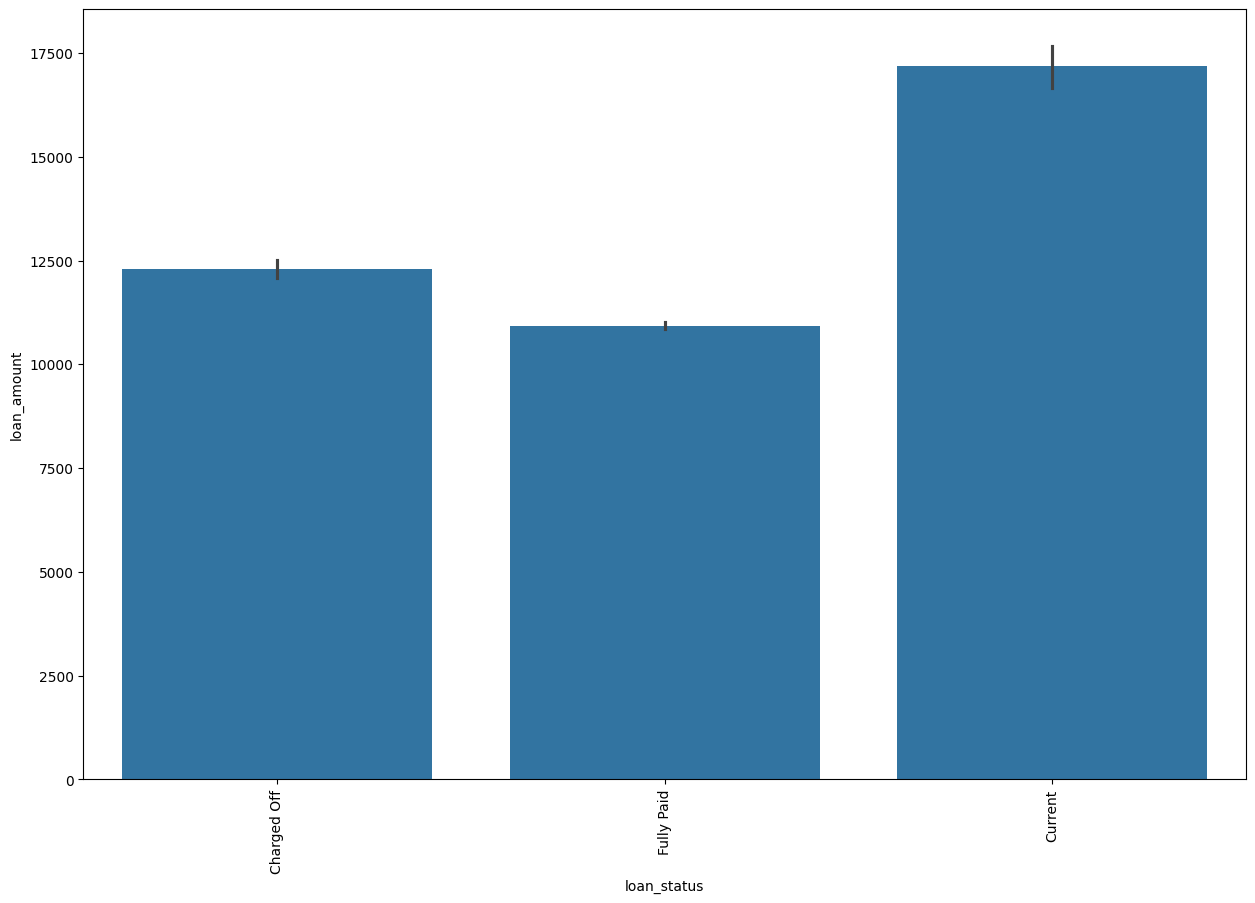

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['loan_status'],y=df1['loan_amount'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='loan_status', ylabel='count'>

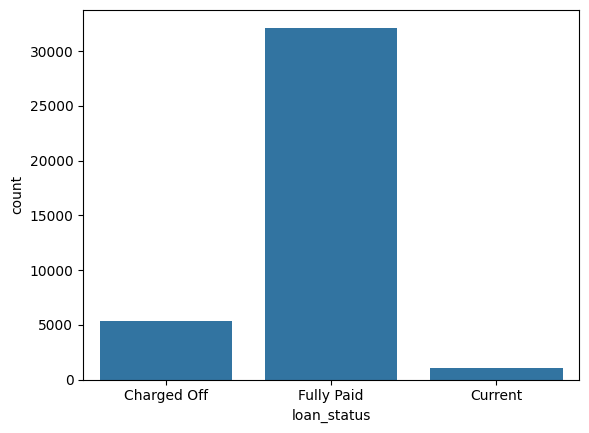

In [46]:
sns.countplot(x=df1['loan_status'])

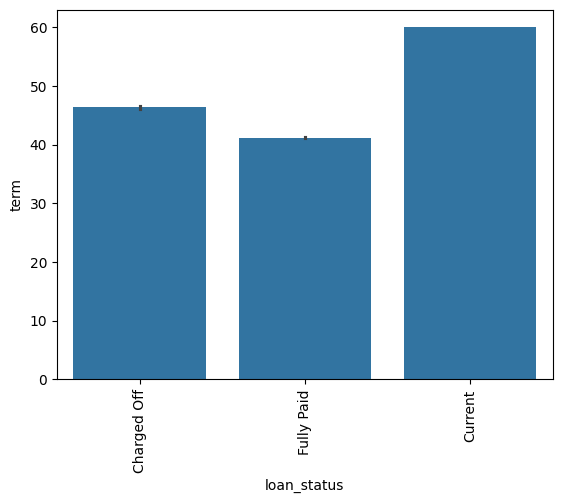

In [47]:
sns.barplot(x=df1['loan_status'],y=df1['term'])
plt.xticks(rotation=90)
plt.show()

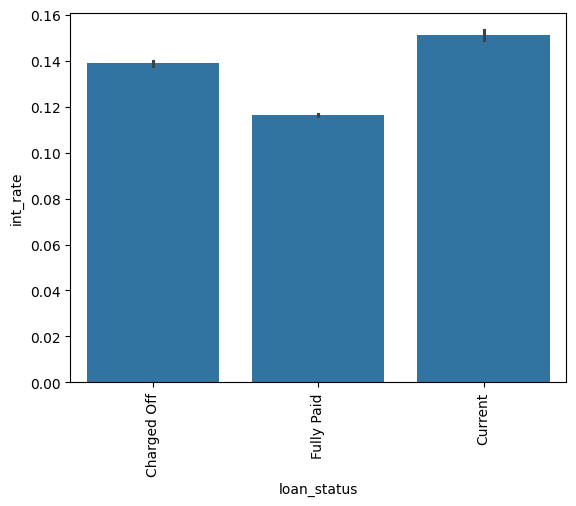

In [48]:
sns.barplot(x=df1['loan_status'],y=df1['int_rate'])
plt.xticks(rotation=90)
plt.show()

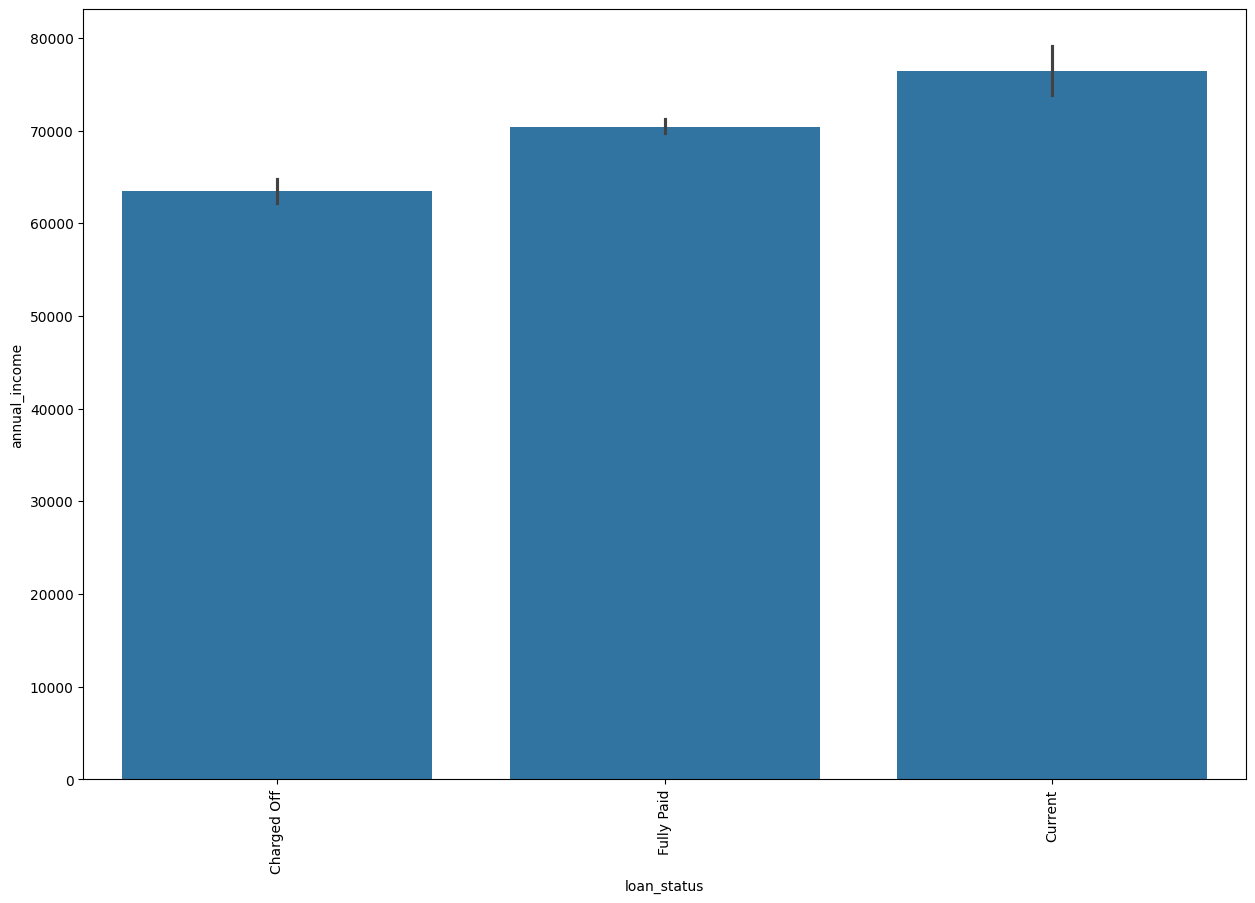

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['loan_status'],y=df1['annual_income'])
plt.xticks(rotation=90)
plt.show()

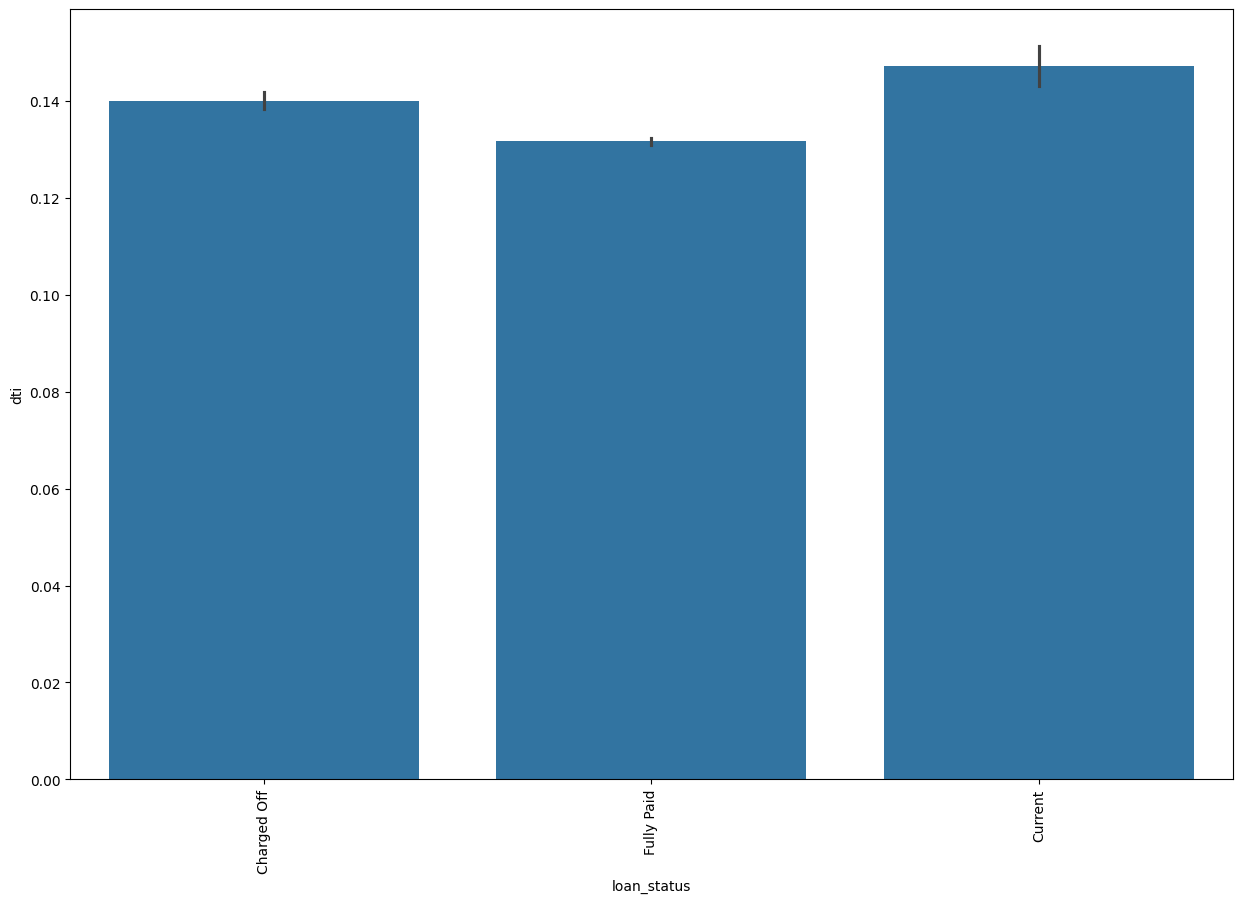

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['loan_status'],y=df1['dti'])
plt.xticks(rotation=90)
plt.show()

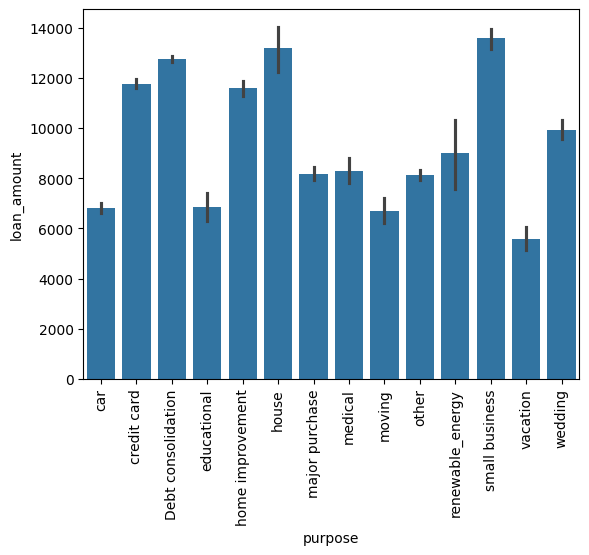

In [51]:
sns.barplot(x=df1['purpose'],y=df1['loan_amount'])
plt.xticks(rotation=90)
plt.show()

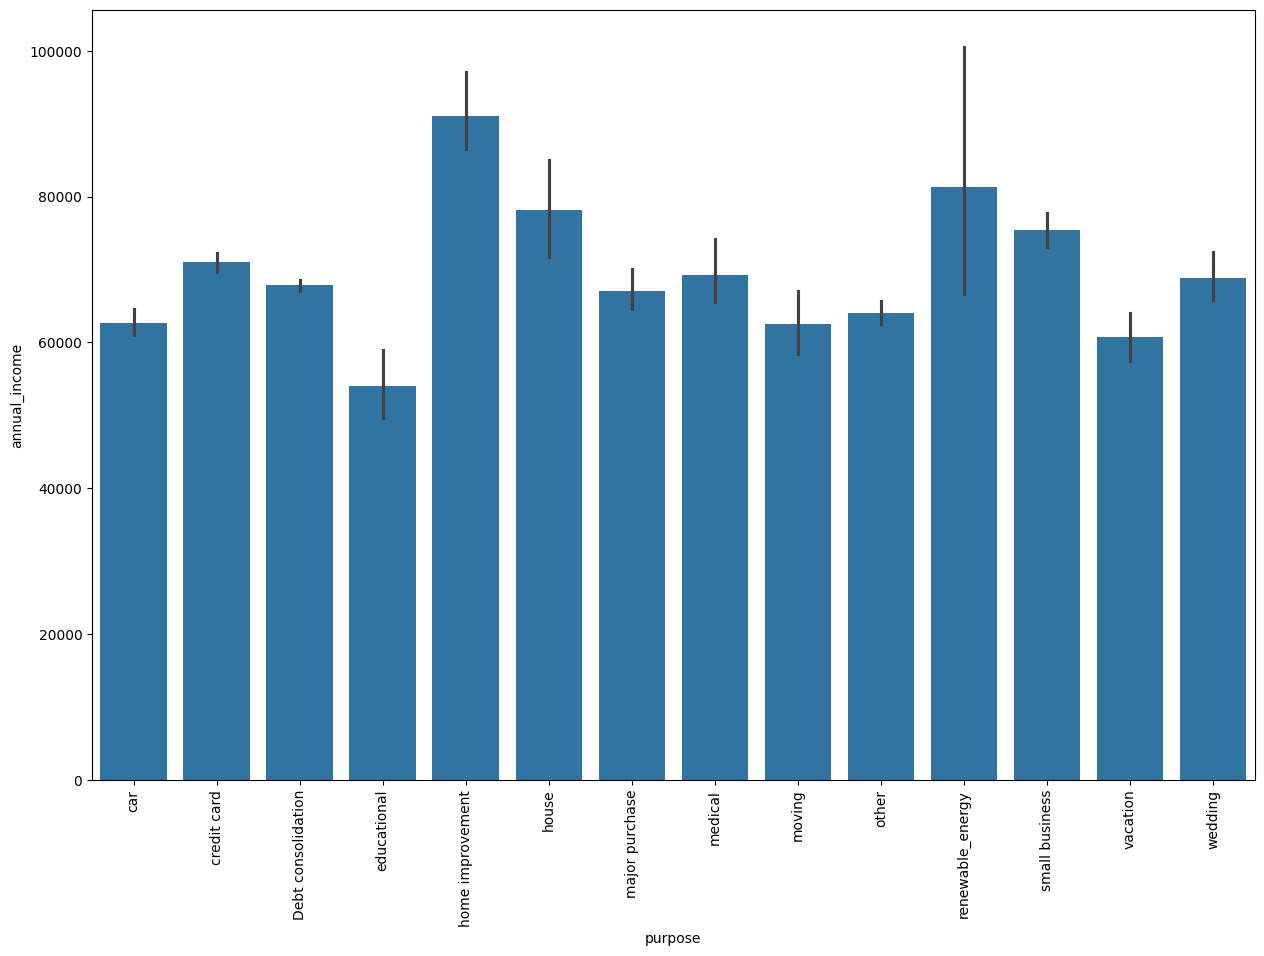

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['purpose'],y=df1['annual_income'])
plt.xticks(rotation=90)
plt.show()

In [53]:
if 'issue_date' in df1.columns:
    df1['issue_year'] = df1['issue_date'].dt.year
    df1['issue_month'] = df1['issue_date'].dt.month
    df1.drop('issue_date', axis=1, inplace=True)

In [54]:
df1.drop(['id','member_id'], axis=1, inplace=True)

In [55]:
categorical_columns = df1.select_dtypes(include=['object']).columns
categorical_columns

Index(['address_state', 'application_type', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'last_credit_pull_date', 'last_payment_date',
       'loan_status', 'next_payment_date', 'purpose', 'sub_grade',
       'verification_status'],
      dtype='object')

In [56]:
df1.drop(['address_state','application_type','emp_length','emp_title','next_payment_date','last_credit_pull_date','last_payment_date','next_payment_date'],axis=1,inplace=True)

In [57]:
df1.head()

,grade,home_ownership,loan_status,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,emp_length_num,issue_year,issue_month
0,C,RENT,Charged Off,car,C4,60,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,0,2021,2
1,E,RENT,Fully Paid,car,E1,36,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,9,2021,1
2,C,RENT,Charged Off,car,C5,36,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,4,2021,1
3,B,MORTGAGE,Fully Paid,car,B2,60,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,0,2021,2
4,A,MORTGAGE,Fully Paid,car,A1,36,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,10,2021,1


In [58]:
df1.drop(['total_acc'],axis=1,inplace=True)

In [59]:
df1['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [60]:
df1.describe(include='object')

,grade,home_ownership,loan_status,purpose,sub_grade,verification_status
count,38576,38576,38576,38576,38576,38576
unique,7,5,3,14,35,3
top,B,RENT,Fully Paid,Debt consolidation,B3,Not Verified
freq,11674,18439,32145,18214,2834,16464


In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
col=['grade','home_ownership','purpose','sub_grade','verification_status']

In [63]:
for i in col:
    df1[i]=le.fit_transform(df1[i])
df1.head()

,grade,home_ownership,loan_status,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,emp_length_num,issue_year,issue_month
0,2,4,Charged Off,1,13,60,1,30000.0,0.0100,59.83,0.1527,2500,1009,0,2021,2
1,4,4,Fully Paid,1,20,36,1,48000.0,0.0535,109.43,0.1864,3000,3939,9,2021,1
2,2,4,Charged Off,1,14,36,0,50000.0,0.2088,421.65,0.1596,12000,3522,4,2021,1
3,1,0,Fully Paid,1,6,60,1,42000.0,0.0540,97.06,0.1065,4500,4911,0,2021,2
4,0,0,Fully Paid,1,0,36,2,83000.0,0.0231,106.53,0.0603,3500,3835,10,2021,1


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade                38576 non-null  int64  
 1   home_ownership       38576 non-null  int64  
 2   loan_status          38576 non-null  object 
 3   purpose              38576 non-null  int64  
 4   sub_grade            38576 non-null  int64  
 5   term                 38576 non-null  int64  
 6   verification_status  38576 non-null  int64  
 7   annual_income        38576 non-null  float64
 8   dti                  38576 non-null  float64
 9   installment          38576 non-null  float64
 10  int_rate             38576 non-null  float64
 11  loan_amount          38576 non-null  int64  
 12  total_payment        38576 non-null  int64  
 13  emp_length_num       38576 non-null  int64  
 14  issue_year           38576 non-null  int32  
 15  issue_month          38576 non-null 

In [65]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,Charged Off,13-05-2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,Charged Off,09-02-2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,Fully Paid,12-04-2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,Fully Paid,15-02-2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [66]:
df1['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [67]:
def categorize_loan_status(status):
    if status =='Charged Off' :
        return 'Bad Loan'
    else:
        return 'Good Loan'

In [68]:
df1['Loan Category'] = df1['loan_status'].apply(categorize_loan_status)

In [69]:
df1['Loan Category']=le.fit_transform(df1['Loan Category'])

In [70]:
df1.head()

,grade,home_ownership,loan_status,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,emp_length_num,issue_year,issue_month,Loan Category
0,2,4,Charged Off,1,13,60,1,30000.0,0.0100,59.83,0.1527,2500,1009,0,2021,2,0
1,4,4,Fully Paid,1,20,36,1,48000.0,0.0535,109.43,0.1864,3000,3939,9,2021,1,1
2,2,4,Charged Off,1,14,36,0,50000.0,0.2088,421.65,0.1596,12000,3522,4,2021,1,0
3,1,0,Fully Paid,1,6,60,1,42000.0,0.0540,97.06,0.1065,4500,4911,0,2021,2,1
4,0,0,Fully Paid,1,0,36,2,83000.0,0.0231,106.53,0.0603,3500,3835,10,2021,1,1


In [71]:
df1.drop('loan_status',axis=1,inplace=True)

In [72]:
df1.head()

,grade,home_ownership,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_payment,emp_length_num,issue_year,issue_month,Loan Category
0,2,4,1,13,60,1,30000.0,0.0100,59.83,0.1527,2500,1009,0,2021,2,0
1,4,4,1,20,36,1,48000.0,0.0535,109.43,0.1864,3000,3939,9,2021,1,1
2,2,4,1,14,36,0,50000.0,0.2088,421.65,0.1596,12000,3522,4,2021,1,0
3,1,0,1,6,60,1,42000.0,0.0540,97.06,0.1065,4500,4911,0,2021,2,1
4,0,0,1,0,36,2,83000.0,0.0231,106.53,0.0603,3500,3835,10,2021,1,1


In [73]:
df1['Loan Category'].unique()

array([0, 1])

<Axes: xlabel='Loan Category', ylabel='count'>

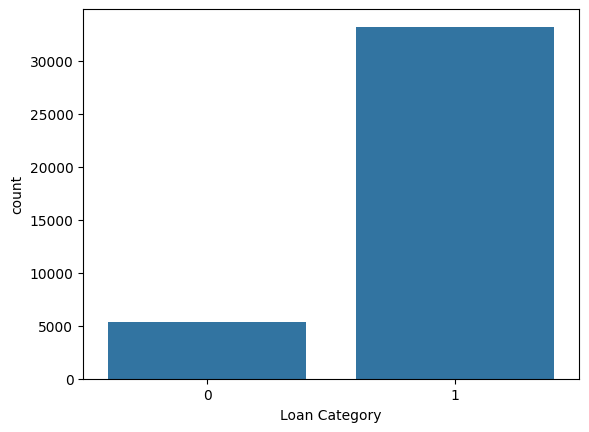

In [74]:
sns.countplot(x=df1['Loan Category'])

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df1)

In [76]:
scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)

In [77]:
X = scaled_df.drop('Loan Category', axis=1)
y = df1['Loan Category']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [80]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_score = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_score)

Confusion Matrix:
 [[ 569  495]
 [   0 6652]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.70      1064
           1       0.93      1.00      0.96      6652

    accuracy                           0.94      7716
   macro avg       0.97      0.77      0.83      7716
weighted avg       0.94      0.94      0.93      7716


ROC-AUC Score: 0.9606454218076763


Hper-Parameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=42), param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.3s
[CV] END max_depth=10, min_sa

In [90]:
class_counts=df1['Loan Category'].value_counts()

In [91]:
imbalance_ratio = class_counts.min()/class_counts.max()
imbalance_ratio

0.16042475107541437

In [93]:
model = RandomForestClassifier(class_weight='balanced',random_state=42, n_estimators=300, max_depth=10,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [94]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [95]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
roc_score = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_score)

Confusion Matrix:
 [[ 819  245]
 [  91 6561]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1064
           1       0.96      0.99      0.98      6652

    accuracy                           0.96      7716
   macro avg       0.93      0.88      0.90      7716
weighted avg       0.96      0.96      0.96      7716


ROC-AUC Score: 0.9577494359771949


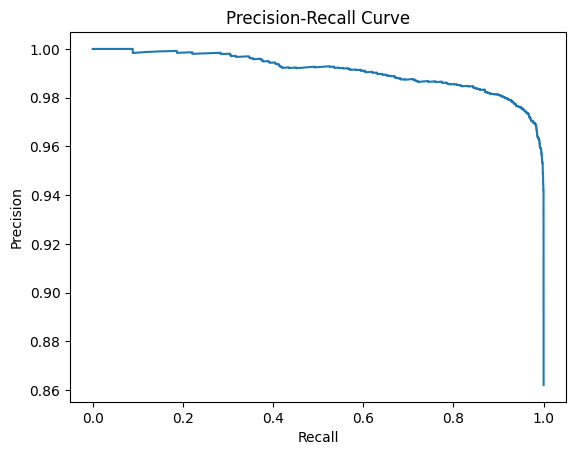

Optimal Threshold: 0.46


In [98]:
from sklearn.metrics import precision_recall_curve

# Use y_prob instead of y_pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Choose threshold for the best balance
optimal_idx = (precision + recall).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")